# Einführung in die Chemieinformatik

Im heutigen Notebook wird es um die benutzung von Python für die Chemieinformatik gehen. 
Als Fallbeispiel werden Sie eine Alternative zu **Sorafenib** suchen. [Sorafenib](https://de.wikipedia.org/wiki/Sorafenib) ist ein Kinaseinhibitor der vorallem bei fortgeschrittenen Nierenkrebs verwendet wird.

Wie Sie in der Vorlesung gelernt haben, ist die erste Hürde in der Chemieinformatik der adequate Format zum speichern von Molekülstrukturen zu finden. Um Moleküle in Python einzulesen bieten sich vorallem *SMILES* zu benutzen. Diese können auch ohne extra Libraries in Python gelesen und manipuliert werden. 

Für viele beschriebene Struturen können sie auf [PubChem](https://pubchem.ncbi.nlm.nih.gov/) die Strukturen in verschiedenen Formaten erhalten. 
Finden Sie  auf PubChem den SMILES für Sorafenib und kopieren Sie diesen in die Zelle hier drunter


<br>

<details>
<summary><strong>Falls kein Internet vorhanden. HIER klicken</strong></summary>

```python
    sorafenib = "CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F"
```
</details>

In [6]:
sorafenib = "" # Den Smiles in " " schreiben da sonst dieser nicht richig erkannt wird
print(sorafenib)
type(sorafenib)

CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F


str

Wie Sie sehen können wird der SMILES als `str` gespeichert. Wir können zwar den string manipulieren und auch Funktionen anwenden. Das Problem ist noch, dass Python den SMILES nicht von einem normalen String unterscheidet. Wir haben keine Möglichkeiten Information über diese Moleküle zu erhalten. Zwar kann Ihnen `len(sorafenib)` die Länge des String nennnen, aber zuum Beispiel nicht aus wie vielen Atomen dieses Molekül besteht.

Hierfür brauchen sie externe Libraries. Eine der meist benutzten Chemielibraries ist RDKit. 
Die wichtigsten Funktionalitäten können mit `from rdkit.Chem import AllChem as Chem` geladen werden. Mit RDKit können Sie nicht nur Moleküle einlesen und darstellen, Sie können diese auch manipulieren und Eigenschaften berechnen lassen. 
Um einen SMILES als Moleküle zu interpretieren, benutzen sie `Chem.MolFromSmiles(SMILES)`.

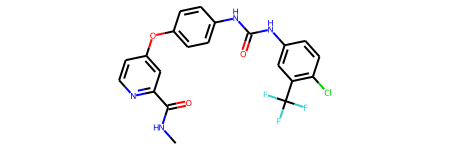

In [7]:
from rdkit.Chem import AllChem as Chem
sorafenib = Chem.MolFromSmiles(sorafenib)
sorafenib

Mit der Hilfe von rdkit können SMILES als valides Moleküle eingelesen und dargestellt werden.
Der `type(sorafenib)` ist jetzt:

In [8]:
type(sorafenib)

rdkit.Chem.rdchem.Mol

Die Funktion `Chem.MolFromSmiles` konvertiert SMILES `string` in einen neue Variablen Typ und zwar den rdkit `Mol`. Solange ein Molküle als `rdkit.Chem.rdchem.Mol`existiert können Sie alle Funktionalitäten von `rdkit` auf diese anwenden. Sie können sich mit `Chem.MolToSmiles(mol)` das Moleküle auch wieder als SMILES ausgeben lassen

In [9]:
Chem.MolToSmiles(sorafenib)

'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1'

Der SMILES string von Sorafenib sieht jetzt anders aus, als der den Sie eingelesen haben. Der Unterschied liegt in der Darstellung der aromatischen Ringe. Im originalen String, wurden explizit Doppelbindung `=` benutzt, jetzt aber kleine `c`. RDKit kanonalisiert automatisch die SMILES nach einem bestimmten Schema. PubChem benutzt eine andere andere Strategie zum Canonalisieren. Sie können SMILES in unterschiedlicher Form einlesen, aber `RDKit` wird immer die selbe Form ausgeben.

Falls ein SMILES eingelsen werden soll, der kein valides Molekül abbildet gibt RDKit einen Fehler aus.


In [10]:
Chem.MolFromSmiles('CNC(=[O-])c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1') # (=[O-]) anstatt (=O)

RDKit ERROR: [11:27:29] Explicit valence for atom # 3 O, 3, is greater than permitted
[11:27:29] Explicit valence for atom # 3 O, 3, is greater than permitted


Jetzt wo Sie Sorafenib im richtigen Format haben können Sie sich auch Informationen ausgeben:

In [11]:
sorafenib.GetNumAtoms() # Aus wie vielen Atomen besteht sorafenib

32

Es bestehen verschieden Funktionen mit den Sie Informationen über Moleküle erhalten können.`rdkit` schreibt jedem Atom und Bindung eine Index zu. Über diesen Index können Sie einzelne Atom oder auch Bindung auswählen. Welches Atom welchen Index hat können Sie sehen, indem wir die `Draw` optionen wie folgt ändern.

In [12]:
from rdkit.Chem import Draw # Draw sublibrary ist für die visuaelle Darstellung von Molekülen zuständig
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True 
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = (500, 500) 

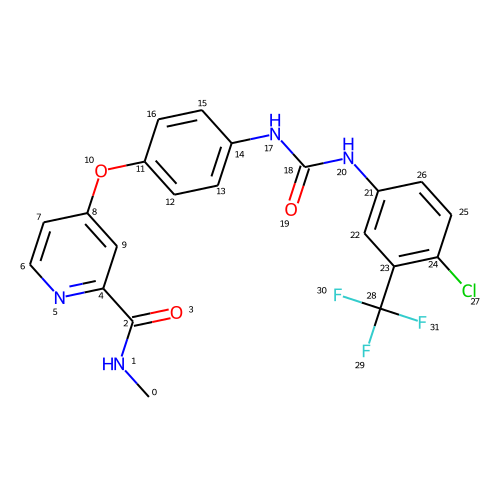

In [13]:
sorafenib

Sie können jetzt einzelne Atom an Hand des Indices mit `.GetAtomWithIdx()` auswählen. Mit weiteren Funktionen können Sie sich dann Informationen zu diesem Atom ausgeben lassen 

In [14]:
print("Masse vom Atom mit dem Index 3")
print(sorafenib.GetAtomWithIdx(3).GetMass())

print("\nHybridizierung vom Atom mit dem Index 3")
print(sorafenib.GetAtomWithIdx(3).GetHybridization())


Masse vom Atom mit dem Index 3
15.999

Hybridizierung vom Atom mit dem Index 3
SP2


Mit der Funktion `.SetAtomicNum()` können SIe auch einzelne Atome ändern und zum Beispiel aus dem Keton ein Imin machen.

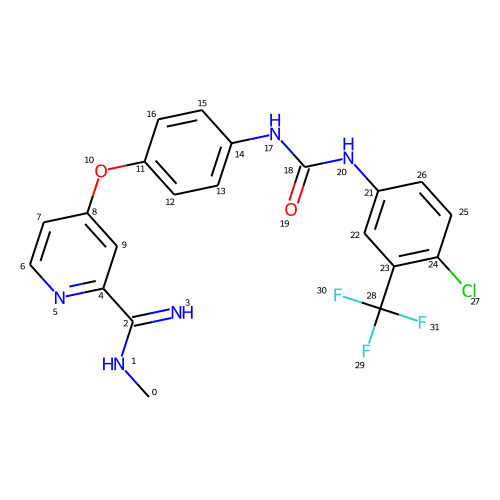

CNC(=N)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1


In [17]:
sorafenib.GetAtomWithIdx(3).SetAtomicNum(7)
display(sorafenib)
print(Chem.MolToSmiles(sorafenib))
sorafenib.GetAtomWithIdx(3).SetAtomicNum(6)# Veränderung wird wieder Rückgängig gemacht  

Das selbe funktioniert auch für Bindungen.

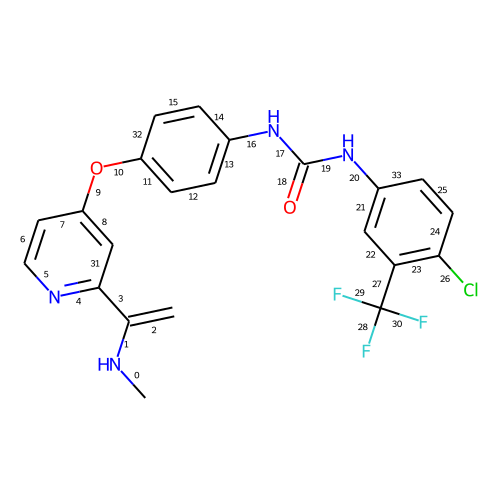

In [18]:
IPythonConsole.drawOptions.addAtomIndices = False # Keine Atom Indizes zeigen
IPythonConsole.drawOptions.addBondIndices = True # Bindungs Indizes zeigen

sorafenib

In [19]:
print("Welche Art von Bindung ist Bindung 4")
print(sorafenib.GetBondWithIdx(4).GetBondType())

print("\nIst Bindung 4 in einem Ring von Größe 7")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(7))

print("\nIst Bindung 4 in einem Ring von Größe 6")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(6))

IPythonConsole.drawOptions.addBondIndices = False

Welche Art von Bindung ist Bindung 4
AROMATIC

Ist Bindung 4 in einem Ring von Größe 7
False

Ist Bindung 4 in einem Ring von Größe 6
True


### Deskriptoren

Hilfreicher als Informationen über einzelne Atome sind Deskriptoren die für ein ganzes Moleküle berechnet werden können. Verschiedene Submodule in `rdkit` erlaubt e sihnene verschiedene Eigenschaften von molekülen zu berechenen:

In [20]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen
print("LogP",Crippen.MolLogP(sorafenib))
print("Molecular Weight",Descriptors.MolWt(sorafenib))

LogP 6.060390000000002
Molecular Weight 460.8430000000001


## Sorafenib Alternativen

Das Ziel ist es alternative Moleküle für Sorafenib zu idenfizieren. Ein Vorauswahl wurde schon getroffen. Die Smiles finden sich in der Variable `smiles`. Sie können mehrere Moleküle nebeneinander mit der Funktion `Draw.MolsToGridImage(mols)` betrchten

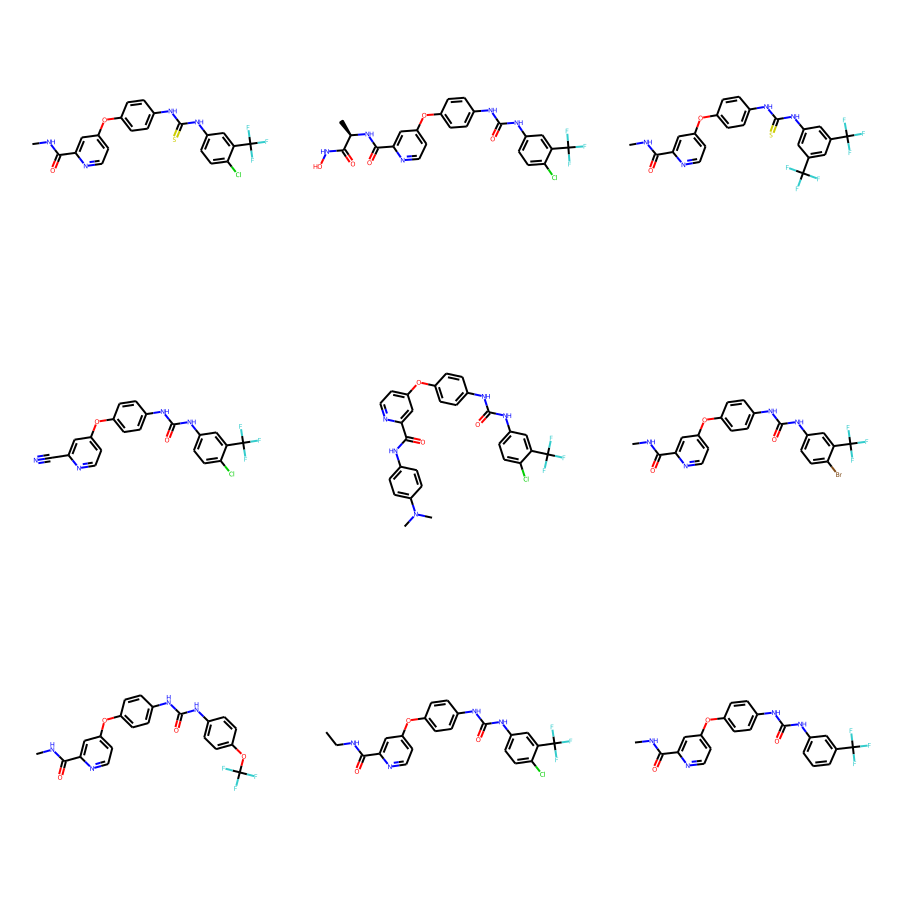

In [21]:
smiles = [
"CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
"C[C@@H](NC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1)C(=O)NO",
"CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc2)ccn1",
"N#Cc1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
"CN(C)c1ccc(NC(=O)c2cc(Oc3ccc(NC(=O)Nc4ccc(Cl)c(C(F)(F)F)c4)cc3)ccn2)cc1", 
"CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Br)c(C(F)(F)F)c3)cc2)ccn1",
"CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(OC(F)(F)F)cc3)cc2)ccn1",
"CCNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
"CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cccc(C(F)(F)F)c3)cc2)ccn1"]

mols = [Chem.MolFromSmiles(x) for x in smiles]
Draw.MolsToGridImage(mols,subImgSize=(300, 300)) #subImgSize erlaub es uns die Moleküle größer zu `drucken`

Damit Sie unnötige Kosten vermeiden, sollen Sie nur die viel versprechendensten Moleküle auswählen. Hierfür können Sie das bisher gelernte anwenden. 
Eine simple aber wichtige Faustformel die im Drugdesign benutz wird ist ["Lipinskis Rule of Five"](https://flexikon.doccheck.com/de/Lipinski%27s_rule_of_five). Sie sagt aus, dass um als Arzneistoff wirksamm zu sein, müssen Moleküle vier Eigenschaften haben.

#### Lipinskis Rule of Five

>- Nicht mehr als 5 Wasserstoffbrückendonoren (vor allem Stickstoff-Wasserstoff- und Sauerstoff-Wasserstoff-Bindungen)
>- Nicht mehr als 10 Wasserstoffbrückenakzeptoren (vor allem Sauerstoff- und Stickstoffatome)
>- Ein Molekulargewicht von weniger als 500 g/mol
>- Ein [logP](https://de.wikipedia.org/wiki/Octanol-Wasser-Verteilungskoeffizient)-Wert von unter 5


Sie haben gerade schon die Funktion für den LogP und Molekularegewicht mit `rdkit`-Funktionen berechnet.
Das Submodul `Lipinski` in rdkit bietet noch weitere Funktionen um die Anzahl der Anzahl der Wasserstoffbrückendonoren und -akzeptoren zu berechnen. 

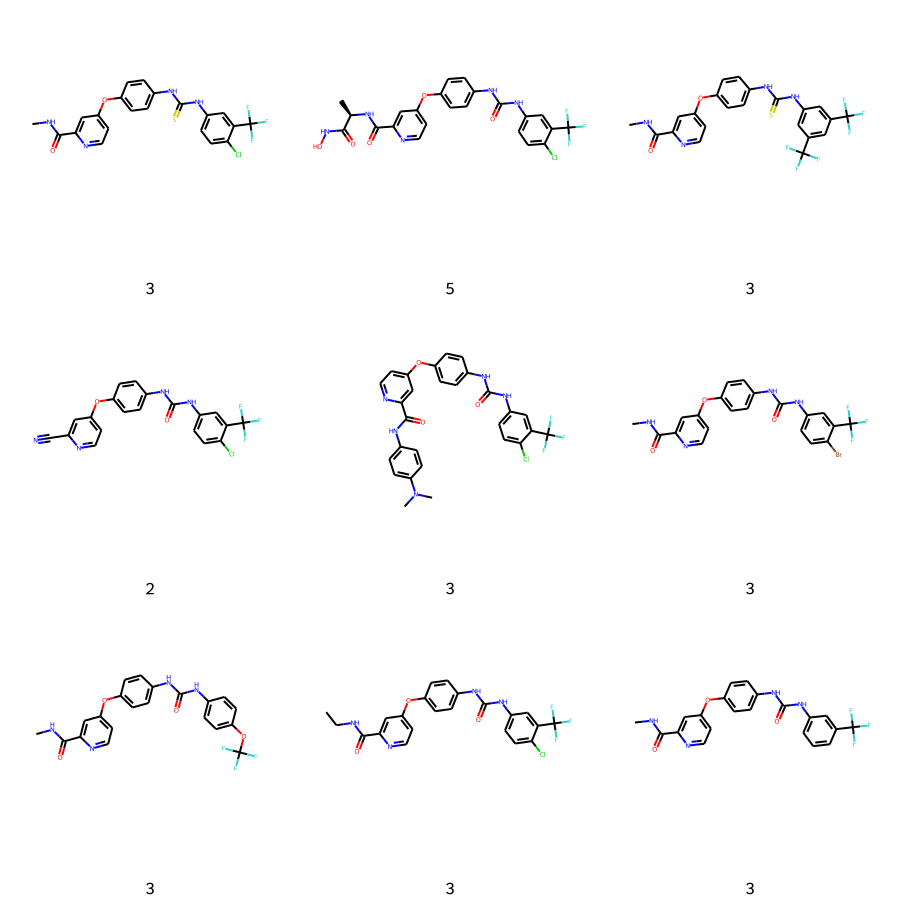

In [22]:
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors

NumDonors = [str(NumHDonors(x)) for x in mols] # Sie konventieren die Anzahl der Donoren zum str damit wir sie als legende benutzen können
Draw.MolsToGridImage(mols, legends = NumDonors,subImgSize = (300,300))

In der Bildunterschrift sehen sie die Anzahl der Wasserstoffbrückendonoren. Alle identifizierten Moleküle haben weniger Donoren als die von Lipinski genannte Obergrenze. Wir können das slebe für die Akzeptoren machen.

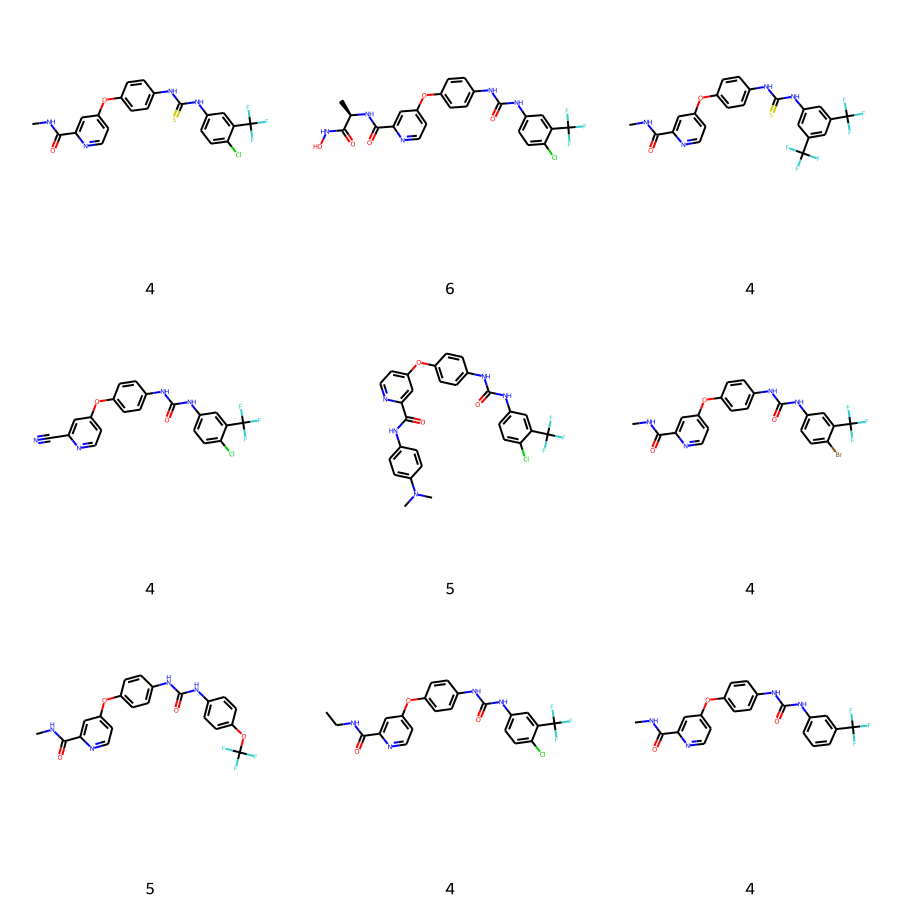

In [23]:
NumAcceptors = [str(NumHAcceptors(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = NumAcceptors, subImgSize= (300,300))

Auch hier bricht keines der Moleküle mit Lipinskis Regel.
Als nächstes berechnen Sie die das molekulare Gewicht für die alternative Moleküle.

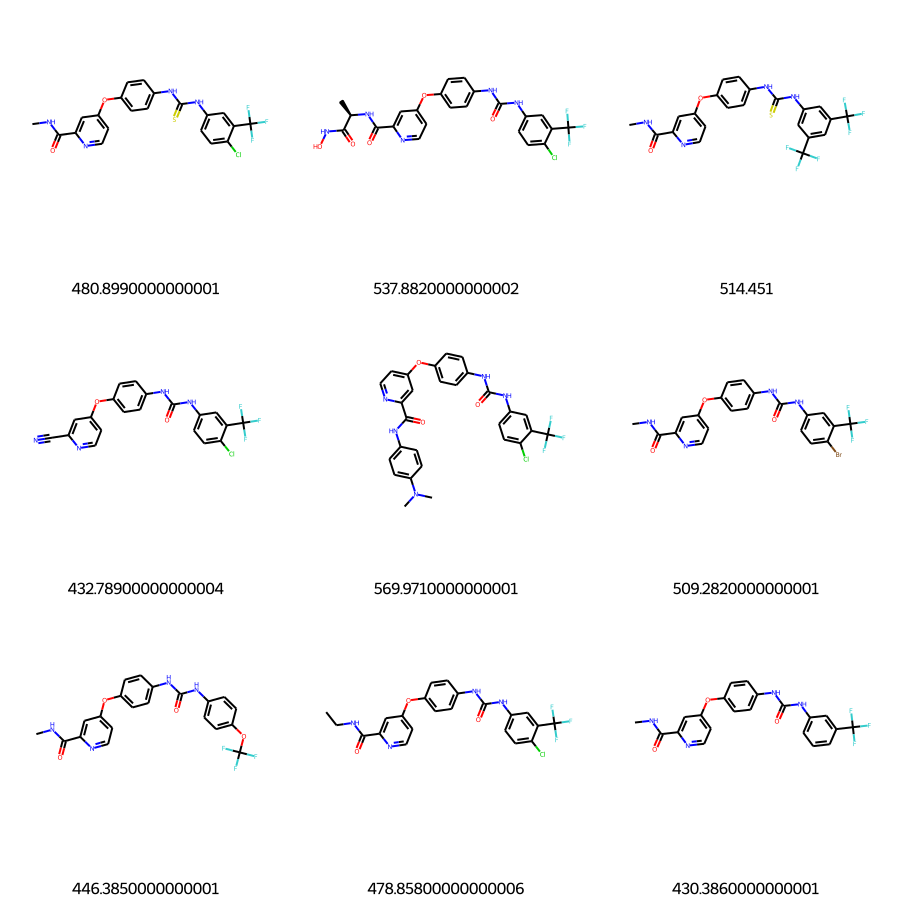

In [24]:
molWeight = [str(Descriptors.MolWt(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = molWeight, subImgSize=(300, 300))

Einige Moleküle sind tatsächlich schwere als Lipsinkis Rule of Five erlaubt.

Als letztes berechnen Sie noch den LogP.

In [ ]:
logP = [str(Crippen.MolLogP(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = logP,subImgSize=(300, 300))

Tatsächlich überschreiten die meisten Moleküle Lipinskis LogP Wert. Nur drei Moleküle haben eine Wert geringer als fünf. Diese beiden letzten Moleküle sind die einzige Noleküle die allen vier Regeln von Lipinski entsprechen, und sind deshalb besonders geeignet als Arzeistofff. Doch sollten Sie nicht alleine auf Grund eines zu hohen LogP Wertes alle andere Molekülevorschläge verwerfen. Sorafenib hat nämlich selber einen LogP Wert der größer als 5 ist. Deswegen entfernen wir nur Moleküle die sowohl ein zu hohen LogP und ein zu hohes Gewicht haben. Sie können `booleans` benutzen umd die richtigen Moleküle auszuwählen z.B. `logP < 5`. Allerdings haben wir vorhin die Werte als `str` gespeichert um sie unter den Molekülen auszugeben. Deshalb berechnen wir die Werte noch einmal, ohne diese zu einem `str` zu konvertieren. Zusätzlich müssen Sie auch die Liste in ein `array` konvertieren, da Sie sonst keine Werte vergleichen können.

In [ ]:
import numpy as np
logP = [Crippen.MolLogP(x) for x in mols]
logP = np.array(logP) # die Liste muss erst noch in einen Array konvertiert werden
logP < 5.0

In [ ]:
molWeight = [Descriptors.MolWt(x) for x in mols]
molWeight = np.array(molWeight)
molWeight < 500

Um die Moleküle auszuwählen die entweder ein Gewicht unter 500 oder einen logP von unter fünf haben können Sie das Symbol `|` benutzen. Das `|` steht für "oder".Das Statement `(logP < 5) | (molWeight<500)` gibt `True` aus für Elemente die mindestens eine der beiden Konditionen erfüllt. `False` wird ausgegeben wenn ein Element keine der beiden Konditionen erfüllt. Man kann es also lesen als entweder einen logP kleiner als fünf oder ein Gewicht unter 500g/mol.


In [25]:
(logP < 5) | (molWeight<500)

NameError: name 'logP' is not defined

Mit diesem `bool` array können wir jetzt die Moleküle auswählen die noch übrig bleiben.

In [ ]:
mols=np.array(mols)[(logP < 5) | (molWeight<500)] #wir konvertieren die `mol` Liste auch zu einem array
Draw.MolsToGridImage(mols,subImgSize=(300, 300))

Mit dem berechenen von Deskriptoren konnte Sie die Anzahl der in Frage kommenden Moleküle reduzieren. Im nächsten Schritt lernen sie wie mit Hilfe einer Similarity Search wie die Auswahl noch weiter reduizieren können.

## Fingerprints & Similarity Search

RDKit kann auch verschiedene *Molecular Fingerprints* berechnen. Unter anderem auch den *Extended Connectivty Fingerprint* (ECFP) ursprünglich entwickelt von [Hahn et al.](https://pubs.acs.org/doi/10.1021/ci100050t) 2010. 
RDKit hat eine angewandelte Version, den sie den *Morgan Fingerprint* nennen.
Sie können die Funktion `Chem.GetMorganFingerprint(mol,radius)` benutzen um einen den ECFP zu berechnen. Um die Ähnlichkeit von Fingerprints bewerten stellt RDKit auch Funktion zur Verfügung. Mit `DataStructs.TanimotoSimilarity(fp1,fp2)`  lässt sich zum Beispiel die Tanimoto Similarity berechnen.

In [ ]:
from rdkit import DataStructs
fp_sorafenib = Chem.GetMorganFingerprint(sorafenib,radius=2)
fp_sorafenib

Der Morganfingerprint wird nicht als normaler `np.array` gespeichert. In den nächsten Wochen werden Sie aber lernen wie Sie auch die normalen Vektoren erhalten können.

Sie haben den Fingerprint für Sorafenib berechnet, aber um die Similarity zu berechnen brauchen Sie auch die Fingerprints der anderen Moleküle.

*Schreiben Sie einen `for-loop` der für alle Moleküle in `mols` den Fingerprint berechnet und diese als Liste in `fp_mols` speichert*

In [ ]:
fp_mols = [Chem.GetMorganFingerprint( ___ ,radius = 2) for x in ___ ]

<details>
<summary><strong>Lösung. HIER klicken</strong></summary>

```python
    fp_mols = [Chem.GetMorganFingerprint( x ,radius = 2) for x in mols]
```
</details>
<br>
Um die Similarity zu berechnen benutzen Sie die oben beschriebene Funktion `TanimotoSimilarity(fp1, fp2)`





In [163]:
DataStructs.TanimotoSimilarity(fp_sorafenib,fp_mols[5])

0.6923076923076923

Schreiben Sie einen `for-loop` der für jedes Moleküle in `fp_mols` die Similarity zu Sorafenib berechnet.

In [166]:
sorafenib_similarity = [DataStructs.TanimotoSimilarity(___ , ___ ) for x in ____]
sorafenib_similarity

[0.81,
 0.797979797979798,
 0.7363636363636363,
 0.7653061224489796,
 0.6422018348623854,
 0.6923076923076923]

<details>
<summary><strong>Lösung. HIER klicken</strong></summary>

```python
    [DataStructs.TanimotoSimilarity(fp_sorafenib, x) for x in fp_mols]
```
</details>
<br>


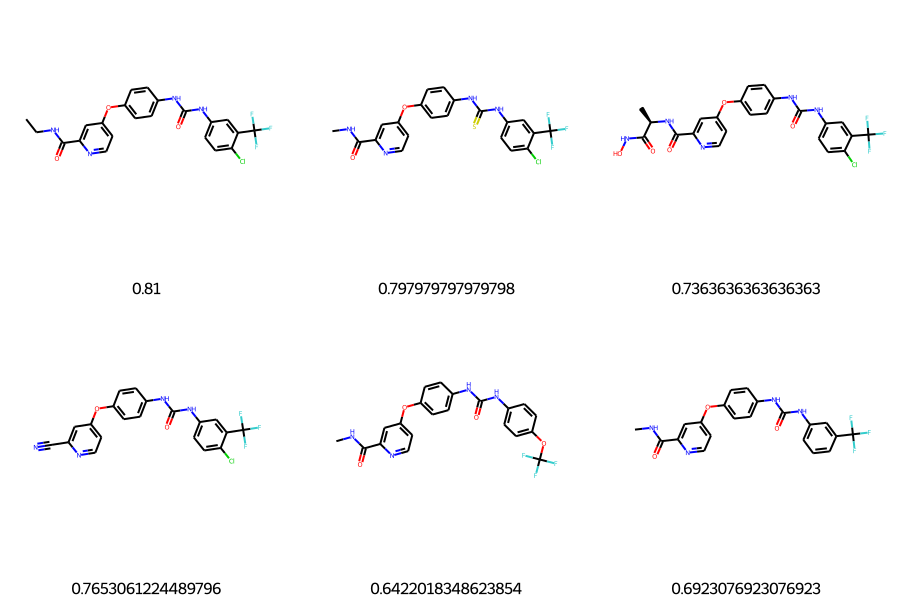

In [167]:
Draw.MolsToGridImage(mols,legends = [str(x) for x in sorafenib_similarity],subImgSize=(300, 300))

Hierdrüber sehen Sie die Similarity der einzelnen Moleküle zu Sorafenib. Ein Moleküle hat eine Similarity von 0.80. Eine oft benutzte Faustregel ist, das ab einer Similarity von 0.8 die Moleküle ähnlich genug sind um als relevante Alternative zu gelten. Das heißt in unserem Fall, dass wir nur eine Moleküle testen würde. Das Moleküle mit eine Similarity von `0.7979...` würde man wahrscheinlcih auch noch als relevant betrachten.
Grundsätzlich wird eine Similarity Search auch oft nur benutzt um den Raum der relevanten Moleküle einzugrenzen.

Aus neun Molekülen die relevantesten heraus zusuchen könnte ein medizinischer Chemiker wahrscheinlich auch ohne Computer. Der eigentliche Vorteil von Computer wird erst ersichtlich, wenn Sie einen Pool aus mehreren Millionen Molekülen haben. Der Code würde genau so funktionieren Sie müssen nur die extra Smiles am Anfang des Notebooks einlesen.
